In [4]:
#load necessary libraries
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Activation, Dense, Flatten
from keras import metrics
from keras import optimizers
from keras import activations,losses
import pandas as pd
import numpy as np

2024-04-24 01:59:11.488777: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from keras.datasets import mnist

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
print(f"shape of x_train:{x_train.shape}")
print(f"shape of x_test:{x_test.shape}")
print(f"shape of y_train:{y_train.shape}")
print(f"shape of y_test:{y_test.shape}")

shape of x_train:(60000, 28, 28)
shape of x_test:(10000, 28, 28)
shape of y_train:(60000,)
shape of y_test:(10000,)


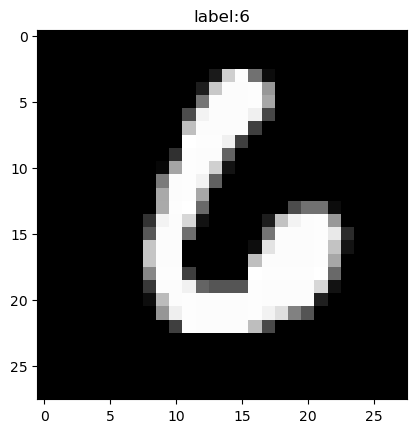

In [8]:
index=np.random.randint(0,len(x_train))
plt.imshow(x_train[index,:,:],cmap="gray")
plt.title(f"label:{y_train[index]}")
plt.show()

In [9]:
#build the model architecture
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(125,activation=activations.relu))
model.add(Dense(68,activation=activations.relu))
model.add(Dense(32,activation=activations.relu))
model.add(Dense(14,activation=activations.relu))
model.add(Dense(10,activation='softmax'))

2024-04-24 01:59:26.291818: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
#compile the model
model.compile(loss=losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 125)               98125     
                                                                 
 dense_1 (Dense)             (None, 68)                8568      
                                                                 
 dense_2 (Dense)             (None, 32)                2208      
                                                                 
 dense_3 (Dense)             (None, 14)                462       
                                                                 
 dense_4 (Dense)             (None, 10)                150       
                                                                 
Total params: 109513 (427.79 KB)
Trainable params: 10951

In [12]:
y_train[1:10]

array([0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:
from keras.utils import to_categorical

In [14]:
y_train.reshape(-1,1)

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [15]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [39]:
model.fit(x_train,y_train_cat,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0910 - accuracy: 0.9751
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0770 - accuracy: 0.9787
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0759 - accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0652 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0582 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0579 - accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0536 - accuracy: 0.9857
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0443 - accuracy: 0.9873
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0432 - accuracy: 0.9879
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/st

In [40]:
from keras.preprocessing import image

In [41]:
def preprocess_img(image_path):
    img=image.load_img(image_path,target_size=(28,28),color_mode='grayscale')
    img_array=image.img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    return img_array


In [42]:
new_image_path="./my_img.png"

#predict the class of the new image
img_array=preprocess_img(new_image_path)
result=model.predict(img_array)
bool_mat=result>0.6
for i in range(10):
    if bool_mat[0][i]:
        print(f"The label of the image is:{i}")

1/1 [==============================] - 0s 17ms/step
The label of the image is:5


In [43]:
bool_mat

array([[False, False, False, False, False,  True, False, False, False,
        False]])